In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('1.ushape.csv')
df.shape

(100, 3)

In [3]:
df.head()

,x,y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


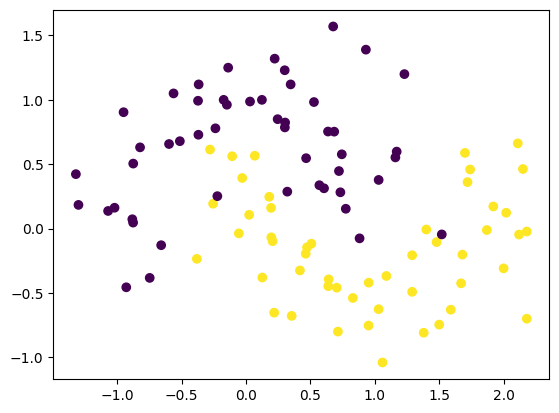

In [5]:
plt.scatter(df['x'],df['y'],c=df['class'])

In [6]:
x = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

# model building

In [7]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [8]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

# Set parameters as 0 (ZERO)

In [10]:
model.get_weights()

[array([[ 0.3098033 , -0.52666867,  0.20179808, -0.0617792 , -0.30002385,
         -0.08187717, -0.66062754,  0.04515934, -0.24076185,  0.38405806],
        [ 0.30002183, -0.56353337, -0.30538106, -0.18490195, -0.00244975,
          0.12644154, -0.2647569 , -0.02444553, -0.02659094, -0.5048636 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.5006632 ],
        [-0.42476058],
        [ 0.3375377 ],
        [-0.09860164],
        [ 0.41391033],
        [-0.35029387],
        [-0.73595595],
        [ 0.4502533 ],
        [-0.55830395],
        [-0.5988691 ]], dtype=float32),
 array([0.], dtype=float32)]

In [12]:
# setting all weights and bias to 0

initial_weights = model.get_weights()

initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [13]:
model.set_weights(initial_weights)

In [14]:
# varifying weights
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [15]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
history = model.fit(x,y,epochs=100,validation_split=0.2 , verbose=0)

In [18]:
model.get_weights()

[array([[ 0.42726606,  0.42726606,  0.42726606,  0.42726606,  0.42726606,
          0.42726606,  0.42726606,  0.42726606,  0.42726603,  0.42726603],
        [-0.4710387 , -0.4710387 , -0.4710387 , -0.4710387 , -0.4710387 ,
         -0.4710387 , -0.4710387 , -0.4710387 , -0.47103873, -0.47103873]],
       dtype=float32),
 array([-0.13680671, -0.13680671, -0.13680671, -0.13680671, -0.13680671,
        -0.13680671, -0.13680671, -0.13680671, -0.13680671, -0.13680671],
       dtype=float32),
 array([[0.05399146],
        [0.05399146],
        [0.05399146],
        [0.05399146],
        [0.05399146],
        [0.05399146],
        [0.05399146],
        [0.05399146],
        [0.05399147],
        [0.05399147]], dtype=float32),
 array([-0.05216762], dtype=float32)]

we use sigmoid activation function so each input perceptron act like a single perceptron it is not capabal to find non - linear pattern

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

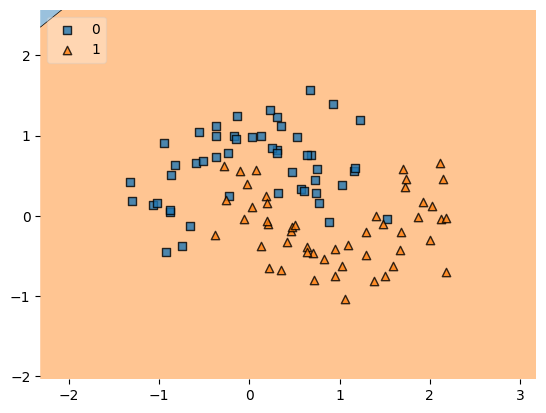

In [20]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y.astype('int'), clf=model, legend=2)

# case 2 : non - zero but same

In [21]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.get_weights()

[array([[-0.19841689, -0.04313898, -0.34201983,  0.54196495, -0.25172493,
         -0.2505291 , -0.09291846,  0.4772554 ,  0.27248424, -0.53781366],
        [ 0.3967443 , -0.14645272, -0.55000776,  0.7025623 , -0.29151237,
          0.5764236 , -0.18608522, -0.33640653,  0.11689413,  0.45136732]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.43287382],
        [ 0.2286027 ],
        [ 0.10326415],
        [-0.4924463 ],
        [-0.47616896],
        [-0.19939691],
        [-0.53795165],
        [-0.25132528],
        [ 0.05467242],
        [-0.47307375]], dtype=float32),
 array([0.], dtype=float32)]

In [23]:
# set weights and bias to 0.5

initial_weights = model.get_weights()

initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

In [24]:
model.set_weights(initial_weights)

In [25]:
model.get_weights()

[array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]], dtype=float32),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [26]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
history = model.fit(x,y,epochs=100,validation_split=0.2 , verbose = 0)

In [28]:
model.get_weights()

[array([[0.43984607, 0.43984607, 0.43984607, 0.43984607, 0.43984607,
         0.43984607, 0.43984607, 0.43984607, 0.43984607, 0.43984607],
        [0.24589561, 0.24589561, 0.24589561, 0.24589561, 0.24589561,
         0.24589561, 0.24589561, 0.24589561, 0.24589561, 0.24589561]],
       dtype=float32),
 array([0.2579412, 0.2579412, 0.2579412, 0.2579412, 0.2579412, 0.2579412,
        0.2579412, 0.2579412, 0.2579412, 0.2579412], dtype=float32),
 array([[0.23231542],
        [0.23231542],
        [0.23231542],
        [0.23231542],
        [0.23231542],
        [0.23231542],
        [0.23231542],
        [0.23231542],
        [0.23231542],
        [0.23231542]], dtype=float32),
 array([0.22418812], dtype=float32)]

**we use sigmoid activation function so each input perceptron act like a single perceptron it is not capabal to find non - linear pattern**

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


<Axes: >

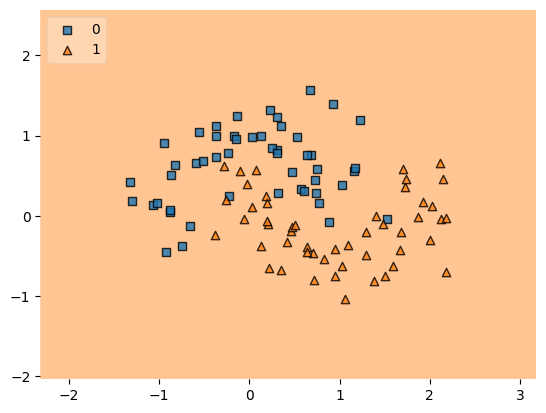

In [29]:
plot_decision_regions(x,y.astype('int'), clf=model, legend=2)

# Case 3 : small random initialization

In [30]:
model = Sequential()

model.add(Dense(2,activation='tanh',input_dim=2))
model.add(Dense(2,activation='tanh'))
model.add(Dense(2,activation='tanh'))
model.add(Dense(2,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27 (108.00 B)

 Trainable params: 27 (108.00 B)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.get_weights()

[array([[ 0.3594935 ,  0.32977474],
        [ 0.14882088, -0.9963629 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.31591022,  0.94570386],
        [ 0.6241456 , -1.178912  ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.39658362,  1.139104  ],
        [-0.6755795 ,  0.24174082]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.28744847,  0.7426194 ],
        [ 0.7033906 , -1.211133  ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.19571984],
        [ 1.3210613 ]], dtype=float32),
 array([0.], dtype=float32)]

In [37]:
# set weights to a small random values and bias to 0
initial_weights = model.get_weights()

initial_weights[0] = np.random.randn(model.get_weights()[0].shape[0] , model.get_weights()[0].shape[1]) * 0.5
initial_weights[1] = np.zeros(model.get_weights()[1].shape)

initial_weights[2] =np.random.randn(model.get_weights()[2].shape[0] , model.get_weights()[2].shape[1]) * 0.5
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

initial_weights[4] = np.random.randn(model.get_weights()[4].shape[0] , model.get_weights()[4].shape[1]) * 0.5
initial_weights[5] = np.zeros(model.get_weights()[5].shape)

initial_weights[6] = np.random.randn(model.get_weights()[6].shape[0] , model.get_weights()[6].shape[1]) * 0.5
initial_weights[7] = np.zeros(model.get_weights()[7].shape)

initial_weights[8] = np.random.randn(model.get_weights()[8].shape[0] , model.get_weights()[8].shape[1]) * 0.5
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [38]:
model.set_weights(initial_weights)

In [39]:
model.get_weights()

[array([[ 0.3954715 , -0.87745214],
        [-0.19581944,  1.1704563 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.05873724, -0.36768767],
        [ 0.18112677,  0.5490426 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.6164871 , -0.24032344],
        [-0.11303519,  0.30996892]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.7282713 , -0.17809989],
        [-0.68866426, -0.5929927 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.05365794],
        [-0.53266376]], dtype=float32),
 array([0.], dtype=float32)]

In [40]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [41]:
history = model.fit(x,y,epochs=100,validation_split=0.2 , verbose = 0)

In [42]:
model.get_weights()

[array([[ 0.51038533, -0.7623046 ],
        [-0.54633355,  1.5405183 ]], dtype=float32),
 array([-0.12014686,  0.14577821], dtype=float32),
 array([[-0.4253838 , -0.4119442 ],
        [ 0.5413754 ,  0.59098995]], dtype=float32),
 array([0.03413787, 0.01074506], dtype=float32),
 array([[-1.0255967 , -0.63259566],
        [-0.47350046, -0.01729457]], dtype=float32),
 array([-0.02056157,  0.00721822], dtype=float32),
 array([[-1.0569878, -0.5500026],
        [-1.0560695, -0.7997011]], dtype=float32),
 array([-0.00115204, -0.00979235], dtype=float32),
 array([[-0.3693531 ],
        [-0.90804493]], dtype=float32),
 array([0.01191464], dtype=float32)]

vanishing gradient problem occur

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

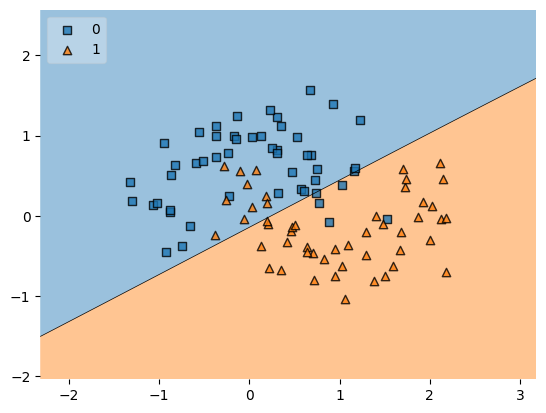

In [43]:
plot_decision_regions(x,y.astype('int'), clf=model, legend=2)

# large random values

works as same but where exloading gradient descent occur